In [1]:
# 1 Mount the google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#2 Read the csv dataset using appropriate method.
import numpy as np
import pandas as pd

ufc_stats = pd.read_csv('/content/gdrive/MyDrive/ufc-fighters-statistics.csv')
ufc_stats_df = pd.DataFrame(ufc_stats)

In [4]:
ufc_stats_df = ufc_stats_df.drop_duplicates()
ufc_stats_df.head()
ufc_stats_df.info()
ufc_stats_df['win_percentage'] = (ufc_stats_df['wins'] / (ufc_stats_df['wins'] +\
                                  ufc_stats_df['losses'])) * 100
ufc_stats_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4109 entries, 0 to 4108
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4109 non-null   object 
 1   nickname                                      2255 non-null   object 
 2   wins                                          4109 non-null   int64  
 3   losses                                        4109 non-null   int64  
 4   draws                                         4109 non-null   int64  
 5   height_cm                                     3812 non-null   float64
 6   weight_in_kg                                  4022 non-null   float64
 7   reach_in_cm                                   2183 non-null   float64
 8   stance                                        3287 non-null   object 
 9   date_of_birth                                 2975 non-null   o

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,win_percentage
count,4109.000000,4109.000000,4109.000000,3812.000000,4022.000000,2183.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4109.000000,4090.000000
mean,12.360672,5.722073,0.264298,178.234439,77.395405,181.803729,2.442100,35.553906,3.146878,42.666586,1.248537,26.296666,39.015332,2.442100,66.820825
std,9.376023,5.104569,0.822483,8.889213,17.988389,10.679990,1.996586,20.405083,2.850083,22.323827,1.931608,28.728565,34.457155,1.996586,19.475601
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.830000,60.000000
50%,11.000000,4.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,2.330000,69.696970
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.240000,58.000000,1.930000,45.000000,66.000000,3.600000,78.125000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,17.650000,100.000000




# 1. How much does height and reach affect striking accuracy?



In [5]:
height_and_acc = ufc_stats_df[['height_cm','reach_in_cm',\
                               'significant_striking_accuracy']]
height_and_acc.dropna(how='any', inplace=True)
# height_and_acc.sort_values(['height_cm','reach_in_cm'], ascending=False).head(50)
height_and_acc.sort_values(['significant_striking_accuracy'], ascending=False).head(50)

<ipython-input-5-131bb52cf209>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_and_acc.dropna(how='any', inplace=True)


,height_cm,reach_in_cm,significant_striking_accuracy
2659,193.04,198.12,100.0
3101,185.42,187.96,100.0
1497,175.26,177.80,100.0
791,187.96,193.04,92.0
2969,182.88,180.34,87.0
113,175.26,182.88,80.0
1179,185.42,190.50,80.0
130,172.72,175.26,80.0
2478,182.88,190.50,80.0
2712,198.12,195.58,79.0


Answer: At first I removed the null values in concerning reach, which unfortunately divided the data in half, so it doesn't give us the full picture, but I still wanted to see the affect of the height and reach.

I first sorted the height and reach descending and I saw that the the first 50 fighters with the longest arms and tallest height had a higher striking accuracy than the average, so we can see that it does have an advantage, but it is not linear. When I sorted the striking accuracy descending, the data shows that many of the highest striking accuracies are not that much taller or have longer arms than the mean (which is 180cm), some in fact have a shorter reach/height.

# 2. Does it play a factor in takedown accuracy at all?

In [6]:
height_and_td = height_and_acc.drop('significant_striking_accuracy',axis=1)
height_and_td['takedown_accuracy'] = ufc_stats_df['takedown_accuracy']
# height_and_td.sort_values(['height_cm', 'reach_in_cm'], ascending=False).head(50)
height_and_td.sort_values('takedown_accuracy', ascending=False).head(50)

,height_cm,reach_in_cm,takedown_accuracy
4108,170.18,172.72,100.0
691,165.10,170.18,100.0
170,187.96,190.50,100.0
169,193.04,200.66,100.0
570,190.50,195.58,100.0
2617,162.56,157.48,100.0
1769,187.96,203.20,100.0
153,157.48,160.02,100.0
2641,175.26,185.42,100.0
1750,154.94,160.02,100.0


Answer: When looking at the data, I sorted the the height and reach and the takedown accuracy was all over the place. Many of the first 50 accuracies were actually lower than average. When I sorted the takedown accuracy descending, a lot of the heights and reaches were actually shorter than average. It seems for wrestling grappling, that shorter fighters have the advantage I'm assuming to their lower stature and better sense of gravity.

# 3. Is there an advantage to the stance a fighter adopts?

<ipython-input-7-5ec6c2daafa5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stance.dropna(how='any', inplace=True)


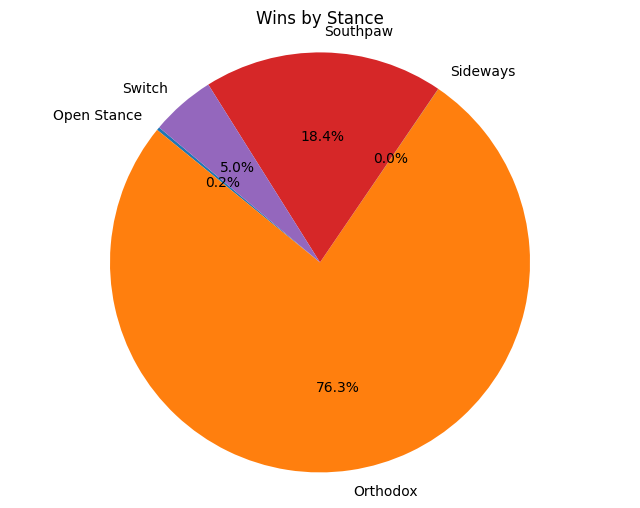

In [7]:
import matplotlib.pyplot as plt

stance = ufc_stats_df[['stance', 'wins','losses', 'significant_striking_accuracy',\
                       'significant_strike_defence']]
stance.dropna(how='any', inplace=True)
wins_stance_acc = stance.groupby('stance').agg({'wins':'sum',\
                                'significant_striking_accuracy':'mean'})
plt.figure(figsize=(8,6))
plt.pie(wins_stance_acc['wins'], labels=wins_stance_acc.index, autopct='%1.1f%%', startangle=140)
plt.title('Wins by Stance')
plt.axis('equal')

plt.show()

Answer: I grouped together the amount of wins and striking accuracy based on the stances of the fighters. The algorithm calculates a total of the fighters wins and the means of their striking accuracies. As you can see, it seems like the orthodox fighters carry the bigger advantage. It's an age old trope that southpaws have the advantage in boxing, so this is an interesting perspective.

# 4. Does the volume of submission attempts increase the chance of winning versus the volume of strikes landed

<ipython-input-8-479f7ca0e35d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume['Category'] = 'Below Average Everything'


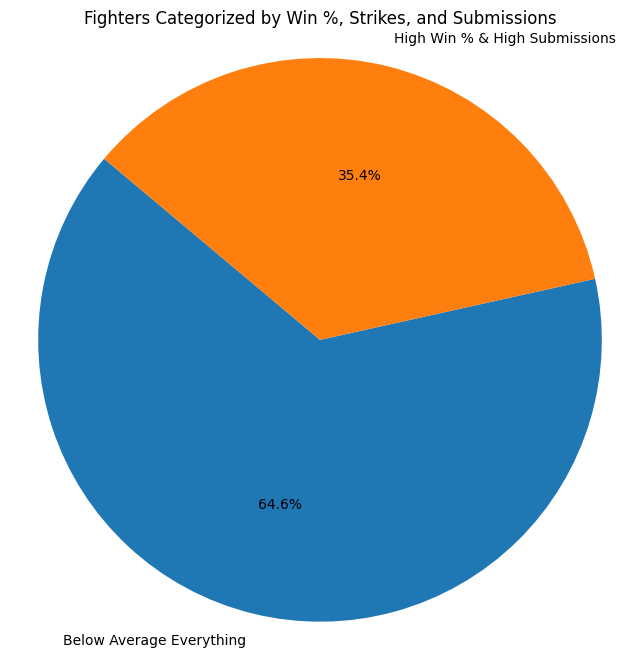

In [8]:
volume = ufc_stats_df[['win_percentage','significant_strikes_landed_per_minute', \
                       'average_submissions_attempted_per_15_minutes']]

high_winning_percentage_threshold = 66
high_strikes_threshold = 2.44
high_submissions_threshold = 2.44

volume['Category'] = 'Below Average Everything'
volume.loc[(volume['win_percentage'] > high_winning_percentage_threshold) & (volume['significant_strikes_landed_per_minute'] > high_strikes_threshold), 'Category'] = 'High Win % & High Strikes'
volume.loc[(volume['win_percentage'] > high_winning_percentage_threshold) & (volume['average_submissions_attempted_per_15_minutes'] > high_submissions_threshold), 'Category'] = 'High Win % & High Submissions'


category_counts = volume['Category'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fighters Categorized by Win %, Strikes, and Submissions')
plt.axis('equal')

plt.show()

Answer: I placed a threshold on higher winning percentage by filtering out any fighter that doesn't have an above average winning , submission attempt per minute, or strikes landed per minute percentage. As we see by the pie chart, that the high strikes landed haven't even shown up with a high winning percentage as the submissions attempted.

# 5. Weight does not necessarily play a factor in fighting due to the weight classes (unless we’re talking about weight cutting which is not provided in the dataset.) But I would like to see if weight plays a factor in the striking realm. Do bigger fighters absorb more shots?

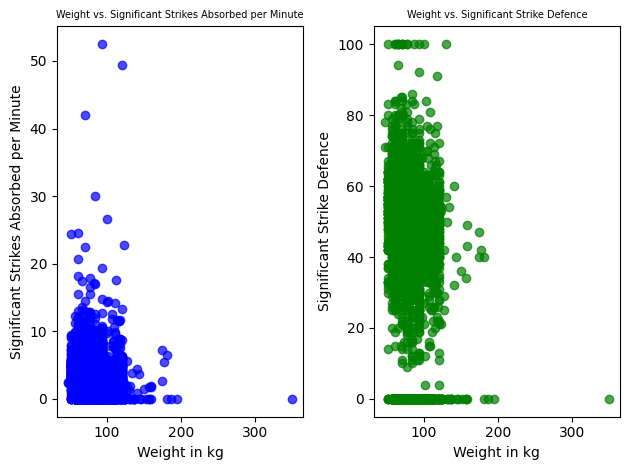

In [9]:
weight_absorb = ufc_stats_df[['weight_in_kg','significant_strikes_absorbed_per_minute',\
                              'significant_strike_defence']]

plt.subplot(1, 2, 1)
plt.scatter(weight_absorb['weight_in_kg'], weight_absorb['significant_strikes_absorbed_per_minute'], color='blue', alpha=0.7)
plt.xlabel('Weight in kg')
plt.ylabel('Significant Strikes Absorbed per Minute')
plt.title('Weight vs. Significant Strikes Absorbed per Minute', fontsize=7)

plt.subplot(1, 2, 2)
plt.scatter(weight_absorb['weight_in_kg'], weight_absorb['significant_strike_defence'], color='green', alpha=0.7)
plt.xlabel('Weight in kg')
plt.ylabel('Significant Strike Defence')
plt.title('Weight vs. Significant Strike Defence', fontsize=7)

plt.tight_layout()
plt.show()

Answer: I was very wrong in my hypothesis. Although the heavier fighters in the green seem to slowly drop in significant strike defense, the strikes absorbed do not get higher as the weight increases. Looking at the data, we see that it actually goes down a little bit the higher the weight increases.

# 6. Do smaller fighters land more shots due to the smaller frame allowing their speed to play a factor more than the heavier weight classes?

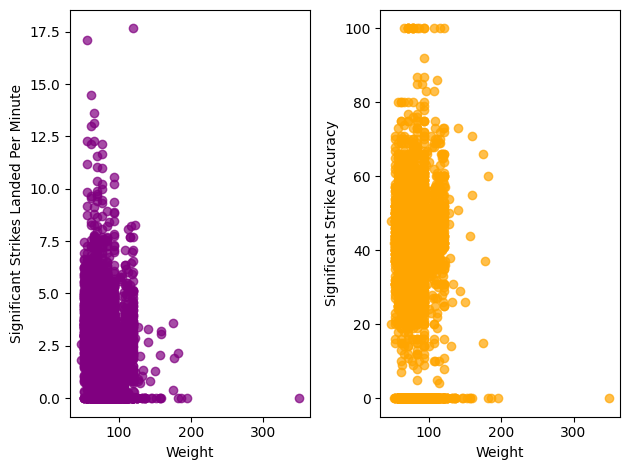

In [10]:
smaller_acc = ufc_stats_df[['significant_strikes_landed_per_minute', 'weight_in_kg',\
                            'significant_striking_accuracy']]

plt.subplot(1,2,1)
plt.scatter(smaller_acc['weight_in_kg'], smaller_acc['significant_strikes_landed_per_minute'],\
            color='purple',alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Significant Strikes Landed Per Minute')

plt.subplot(1,2,2)
plt.scatter(smaller_acc['weight_in_kg'], smaller_acc['significant_striking_accuracy'],\
            color='orange',alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Significant Strike Accuracy')

plt.tight_layout()
plt.show()

Answer: The graphs show that much of the higher statistics concerning significant strike percentage lean more towards the smaller fighters. Especially when you look at the outliers for both scatterplots, the lighter weight fighters reach high striking percentages.

# 7. Who has a higher win percentage? More wrestler based fighters or striker based fighters?

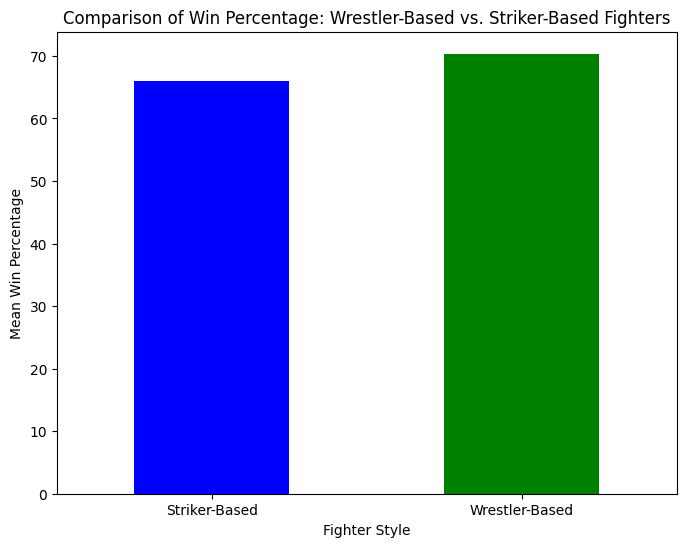

In [15]:
def categorize_fighter_style(row):
    if (row['average_takedowns_landed_per_15_minutes'] > row['significant_strikes_landed_per_minute']):
        return 'Wrestler-Based'
    else:
        return 'Striker-Based'

ufc_stats_df['fighter_style'] = ufc_stats_df.apply(categorize_fighter_style, axis=1)

win_percentage_comparison = ufc_stats_df.groupby('fighter_style')['win_percentage'].mean()

plt.figure(figsize=(8, 6))
win_percentage_comparison.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Fighter Style')
plt.ylabel('Mean Win Percentage')
plt.title('Comparison of Win Percentage: Wrestler-Based vs. Striker-Based Fighters')
plt.xticks(rotation=0)
plt.show()


Answer: I categorized the data into two styles: wrestling and striking, by choosing two of the purest columns concerning their fight statistics(significant strikes landed per minute, and average takedowns landed per 15 minutes). These two columns give a good reflection because compared to attempted takedowns or strikes, they show the success of fighters with high level kickboxing or wrestling. Afterwards, I grouped their winning percentages in those styles. In this bar chart, we see that wrestler-based fighters have a slight advantage over strikers

# 8. How much does takedown defense contribute to a fighters winning percentage?

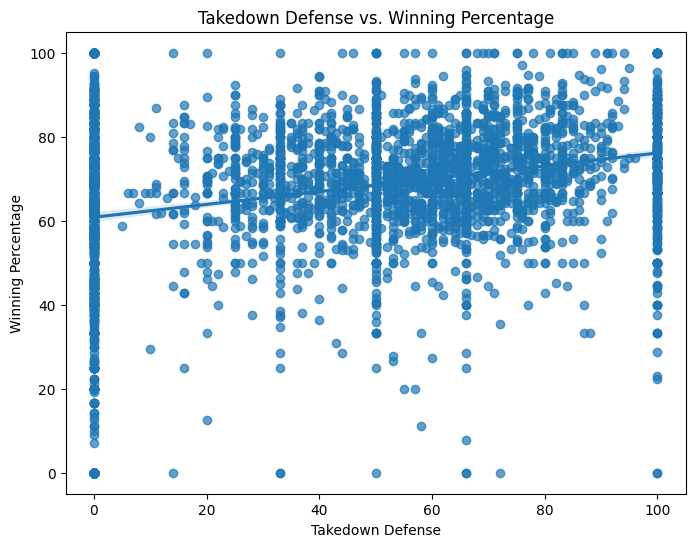

In [19]:

plt.figure(figsize=(8, 6))
plt.scatter(ufc_stats_df['takedown_defense'], ufc_stats_df['win_percentage'], alpha=0.7)
plt.xlabel('Takedown Defense')
plt.ylabel('Winning Percentage')
plt.title('Takedown Defense vs. Winning Percentage')


plt.show()

Answer: By looking at the data, ironically a high takedown defense does not always necessarily a victory. Obviously defense of any kind can help in combat sports, but by looking at the data we see low takedown defense fighters still achieving high percentage wins. My guess is maybe those fighters are fighters who specialize in more ground-based combat like jiu-jitsu, wrestling, sambo, and judo possibly welcoming takedowns to less experienced ground fighters in order to work their submissions.

# 9. Who lands more strikes? Is it those with a higher takedown defense or higher takedown accuracy? Out of the two, who wins more matches?


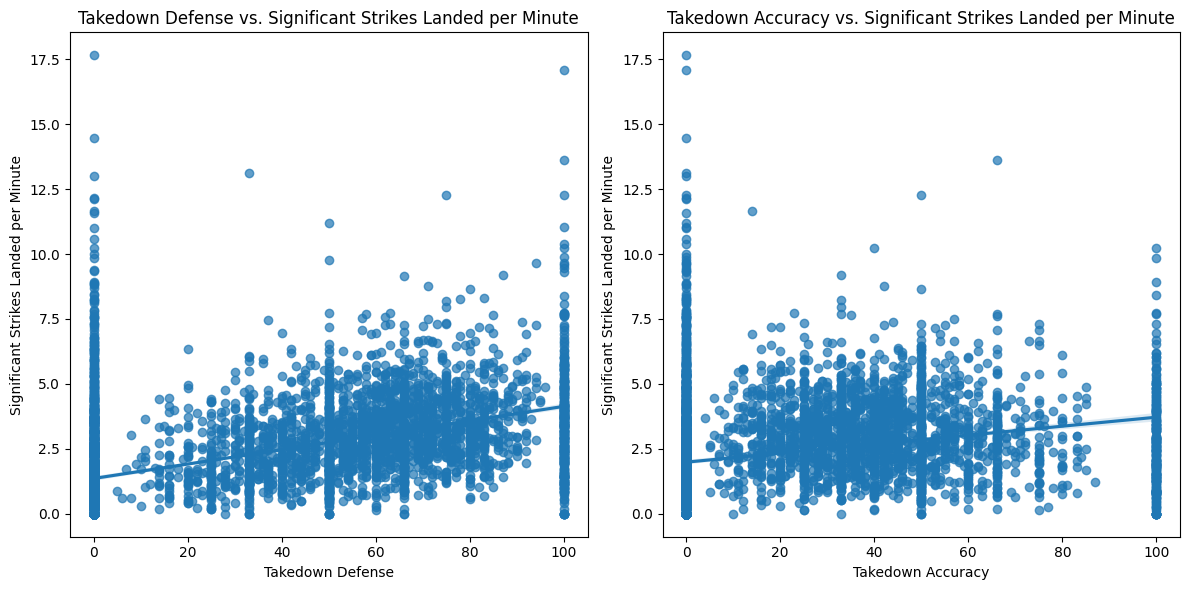

In [27]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='takedown_defense', y='significant_strikes_landed_per_minute', data=ufc_stats_df, scatter_kws={'alpha': 0.7})
plt.xlabel('Takedown Defense')
plt.ylabel('Significant Strikes Landed per Minute')
plt.title('Takedown Defense vs. Significant Strikes Landed per Minute')

plt.subplot(1, 2, 2)
sns.regplot(x='takedown_accuracy', y='significant_strikes_landed_per_minute', data=ufc_stats_df, scatter_kws={'alpha': 0.7})
plt.xlabel('Takedown Accuracy')

plt.ylabel('Significant Strikes Landed per Minute')
plt.title('Takedown Accuracy vs. Significant Strikes Landed per Minute')

plt.tight_layout()
plt.show()

Answer: Although not by much, when looking at the scatterplots, we can see that fighters with a higher takedown defense rate land more strikes per minute than fighters who shoot for takedowns. This can be for a handful of reasons: The fighters aiming to land more takedowns rather than defend, may be going for an approach on the ground, whether that be to ground and pound their opponent or to use sumbissions. Meanwhile, fighters more focused on defending takedowns may not want to go to the ground and keep the fight standing so they can box or kickbox their opponent to victory.

# 10. Does a high striking accuracy always reflect a high striking defense?

Text(0.5, 1.0, 'Striking Accuracy vs. Striking Defense')

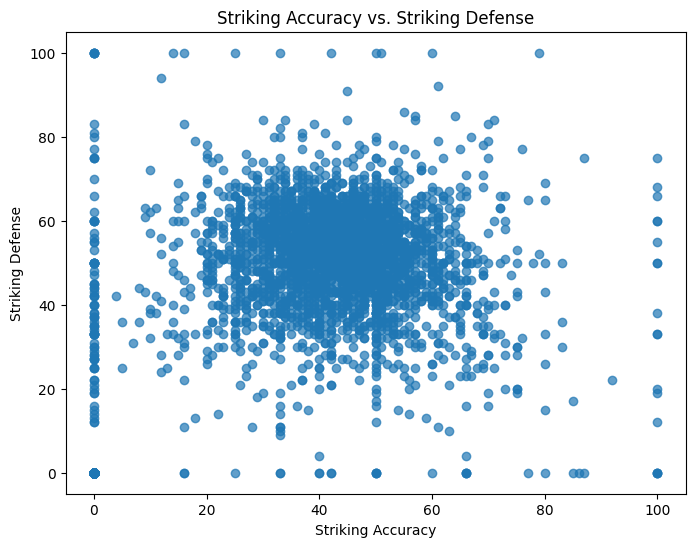

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(ufc_stats_df['significant_striking_accuracy'], ufc_stats_df['significant_strike_defence'], alpha=0.7)
plt.xlabel('Striking Accuracy')
plt.ylabel('Striking Defense')
plt.title('Striking Accuracy vs. Striking Defense')

Answer: The data shows that it is not a direct relationship. Striking accuracy and striking defense are two different skillsets and we can actually see a good number of fighters with a low striking accuracy still attaining a high defensive statistic.